In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import librosa
from librosa import display
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob 
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import *
from sklearn.metrics import confusion_matrix



Using TensorFlow backend.


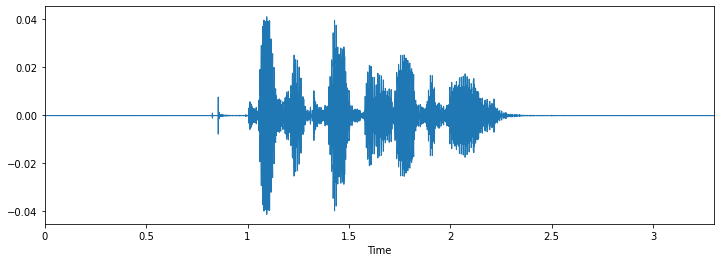

In [ ]:
data, sampling_rate = librosa.load('gdrive/My Drive/DT2119 Speech Speaker Recognition/Project/hol.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
#calculating the mfccs and storing the labels(emotions and actors) and mfccs in a list

path = 'gdrive/My Drive/DT2119 Speech Speaker Recognition/Project/ravdess-emotional-speech-audio/'
path_ = 'gdrive/My Drive/DT2119 Speech Speaker Recognition/Project/'
data_lst = []
for folder, sub_folders, files in os.walk(path):
    for f in files:
        utter, sampling_rate = librosa.load(os.path.join(folder,f), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=utter, sr=sampling_rate, n_mfcc=13).T,axis=0) 
        labels_emotions = int(f[7:8]) - 1
        labels_actor = int(f[18:20]) - 1
        data = mfccs, labels_emotions, labels_actor
        data_lst.append(data)

#converting the list into numpy array and saving it as a .npy file

dataset = np.array(data_lst)
#np.save(path_+'Data_Actor_All.npy', dataset)
np.save(path_+'Data_Actor_All_13.npy', dataset) # to use this change number of mfcc to 13 above.
#np.save(path_+'Data_Actor_All_40.npy', dataset) # to use this change number of mfcc to 40 above.


In [ ]:
#Loading the data and splitting it into training and test
path_ = 'gdrive/My Drive/DT2119 Speech Speaker Recognition/Project/'
data_actor_all = np.load(path_+"Data_Actor_All_13.npy", allow_pickle=True)
mfccs, label_emotions, label_actors = zip(*data_actor_all)


X = np.asarray(mfccs)
Y = np.asarray(label_emotions)
Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.20, shuffle = True)
Xtr, Xval, Ytr, Yval = train_test_split(Xtr, Ytr, test_size=0.20, shuffle = True)



Xtr = np.expand_dims(Xtr, axis=2)
Xtst = np.expand_dims(Xtst, axis=2)
Xval = np.expand_dims(Xval, axis=2)



In [ ]:
print(Xtr.shape)
print(Ytr.shape)
print(Xval.shape)
print(Yval.shape)
print(Xtst.shape)
print(Ytst.shape)

(1849, 25, 1)
(1849,)
(463, 25, 1)
(463,)
(578, 25, 1)
(578,)
